In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

读取数据

In [121]:
path='D:\机器学习——Andrew_rag\code\ex1-linear regression\ex1data1.txt'
data=pd.read_csv(path,header=None,names=['Population','Profit'])
print(data)

    Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


<AxesSubplot:xlabel='Population', ylabel='Profit'>

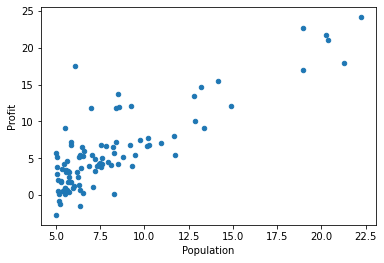

In [122]:
data.plot(kind='scatter',x='Population',y='Profit')

构造cost function（代价函数）

In [123]:
def computecost(x,y,theta):
    j_theta=np.power(((x*theta.T)-y),2)
    return np.sum(j_theta)/(2*len(x))

在训练集增加一列，以便适应向量？？

In [124]:
data.insert(0,'Ones',1)

变量初始化

In [125]:
#分离出来x(population)和y(profit),为了后续求解代价函数带入x和y
cols=data.shape[1]#只输出列数,[0]是行数
x=data.iloc[:,0:cols-1]#去掉profit即y
y=data.iloc[:,cols-1:cols]#去掉population即x

In [126]:
x.head()#head是观察print前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [127]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [128]:
x=np.matrix(x.values)
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))
computecost(x,y,theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [129]:
def gradientdecent(x,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))#按照theta建立temp是为了临时保存theta，方便迭代更新
    parameters=int(theta.ravel().shape[1])#这里是创建j，j值只有0和1，所以parameters为2,ravel是矩阵向量化的操作
    cost=np.zeros(iters)

    for i in range(iters):
        errors=(x*theta.T)-y
        for j in range(parameters):
            term=np.multiply(errors,x[:,j])#j=1时，为errors，x的矩阵第一列是1，j=2时，x为原生x的向量值
            temp[0,j]=theta[0,j]-alpha*(1/x.shape[0])*np.sum(term)
            #temp和theta均为（1,2）矩阵，其实就是theta1和theta0，这个对应的就是公式
        theta=temp
        cost[i]=computecost(x,y,theta)
    return theta,cost

In [130]:
alpha=0.01
iters=1000
g,cost=gradientdecent(x,y,theta,alpha,iters)
computecost(x,y,g)

4.515955503078914

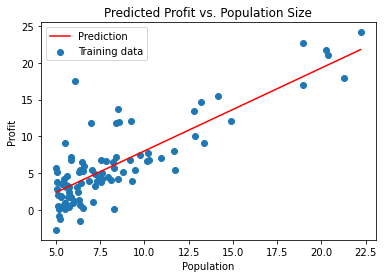

In [131]:
x=np.linspace(data.Population.min(),data.Population.max(),100)
f=g[0,0]+(g[0,1]*x)

# fig,ax=plt.subplots(figsize=(8,4))
plt.plot(x,f,'r',label='Prediction')
plt.scatter(data.Population,data.Profit,label='Training data')
plt.legend(loc=2)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Predicted Profit vs. Population Size')
plt.show()

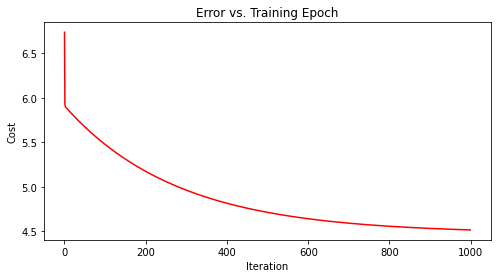

In [132]:
fig,ax=plt.subplots(figsize=(8,4))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归

In [144]:
path = 'D:\机器学习——Andrew_rag\code\ex1-linear regression\ex1data2.txt'
data2 = pd.read_csv(path,header=None,names=['Sizes','Bedrooms','Prices'])
data2.head()

,Sizes,Bedrooms,Prices
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


特征归一化（特征缩放）
(x-均值)/标准差

In [145]:
data2 = (data2-data2.mean()) / data2.std()
data2.head()

,Sizes,Bedrooms,Prices
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [146]:
data2.insert(0,'Ones',1)

cols2=data2.shape[1]
x2=data2.iloc[:,0:cols2-1]
y2=data2.iloc[:,cols2-1:cols2]

x2=np.matrix(x2.values)
y2=np.matrix(y2.values)
theta2=np.matrix(np.array([0,0,0]))

g2,cost2 = gradientdecent(x2,y2,theta2,alpha,iters)
computecost(x2,y2,g2)

0.1307033696077189

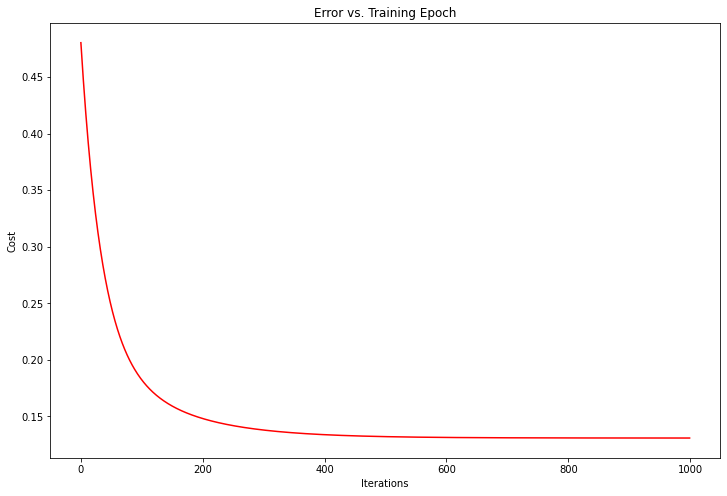

In [147]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()